In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy


In [2]:
file_path = r'C:\Users\EmmanuellaDanso\Desktop\DataSets.txt'

data = []

with open(file_path, 'r') as file:
    combined_spaces = []
    for line in file:
        values = line.strip().split()
    
        combined_spaces.extend(values)
    
        if len(combined_spaces) == 14:
            data.append(combined_spaces)
            combined_spaces = []
        

In [3]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


cleaned_data = pd.DataFrame(data=data, columns=column_names)
#print(cleaned_data)

In [4]:
#normalization 
def min_maxNormal(data, column):

    dataNormalised = cleaned_data.copy()
    data = data[column].apply(pd.to_numeric, errors='coerce')
    
    for col in column:
        max_val = data[col].max()
        min_val = data[col].min()
        
        dataNormalised[col] = (data[col] - min_val) / (max_val - min_val)
    return dataNormalised

dataNormalised = min_maxNormal(cleaned_data, column_names)
#print(dataNormalised.head())  

In [5]:
xdn = dataNormalised.drop('MEDV', axis=1)
ydn = dataNormalised['MEDV']

print(xdn.head())
print(ydn.head())

print(f"min and max Normalisation: {np.max(xdn)} and {np.min(xdn)}")
print(f"min and max Normalisation: {np.max(ydn)} and {np.min(ydn)}")


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS   
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203  \
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  
3  0.086957  0.066794  0.648936  0.994276  0.033389  
4  0.086957  0.066794  0.648936  1.000000  0.099338  
0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64
min and max Normalisation: 1.0 and 0.0
min and max Normalisation: 1.0 and 0.0


In [6]:
X_train = cleaned_data.drop('MEDV', axis=1)
y_train = cleaned_data['MEDV']


In [7]:
print(f"{np.max(X_train)}")
print(f"{np.max(y_train)}")

99.30
9.70


In [8]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

In [9]:
print(f"{np.max(X_train)}")
print(f"{np.max(y_train)}")

711.0
50.0


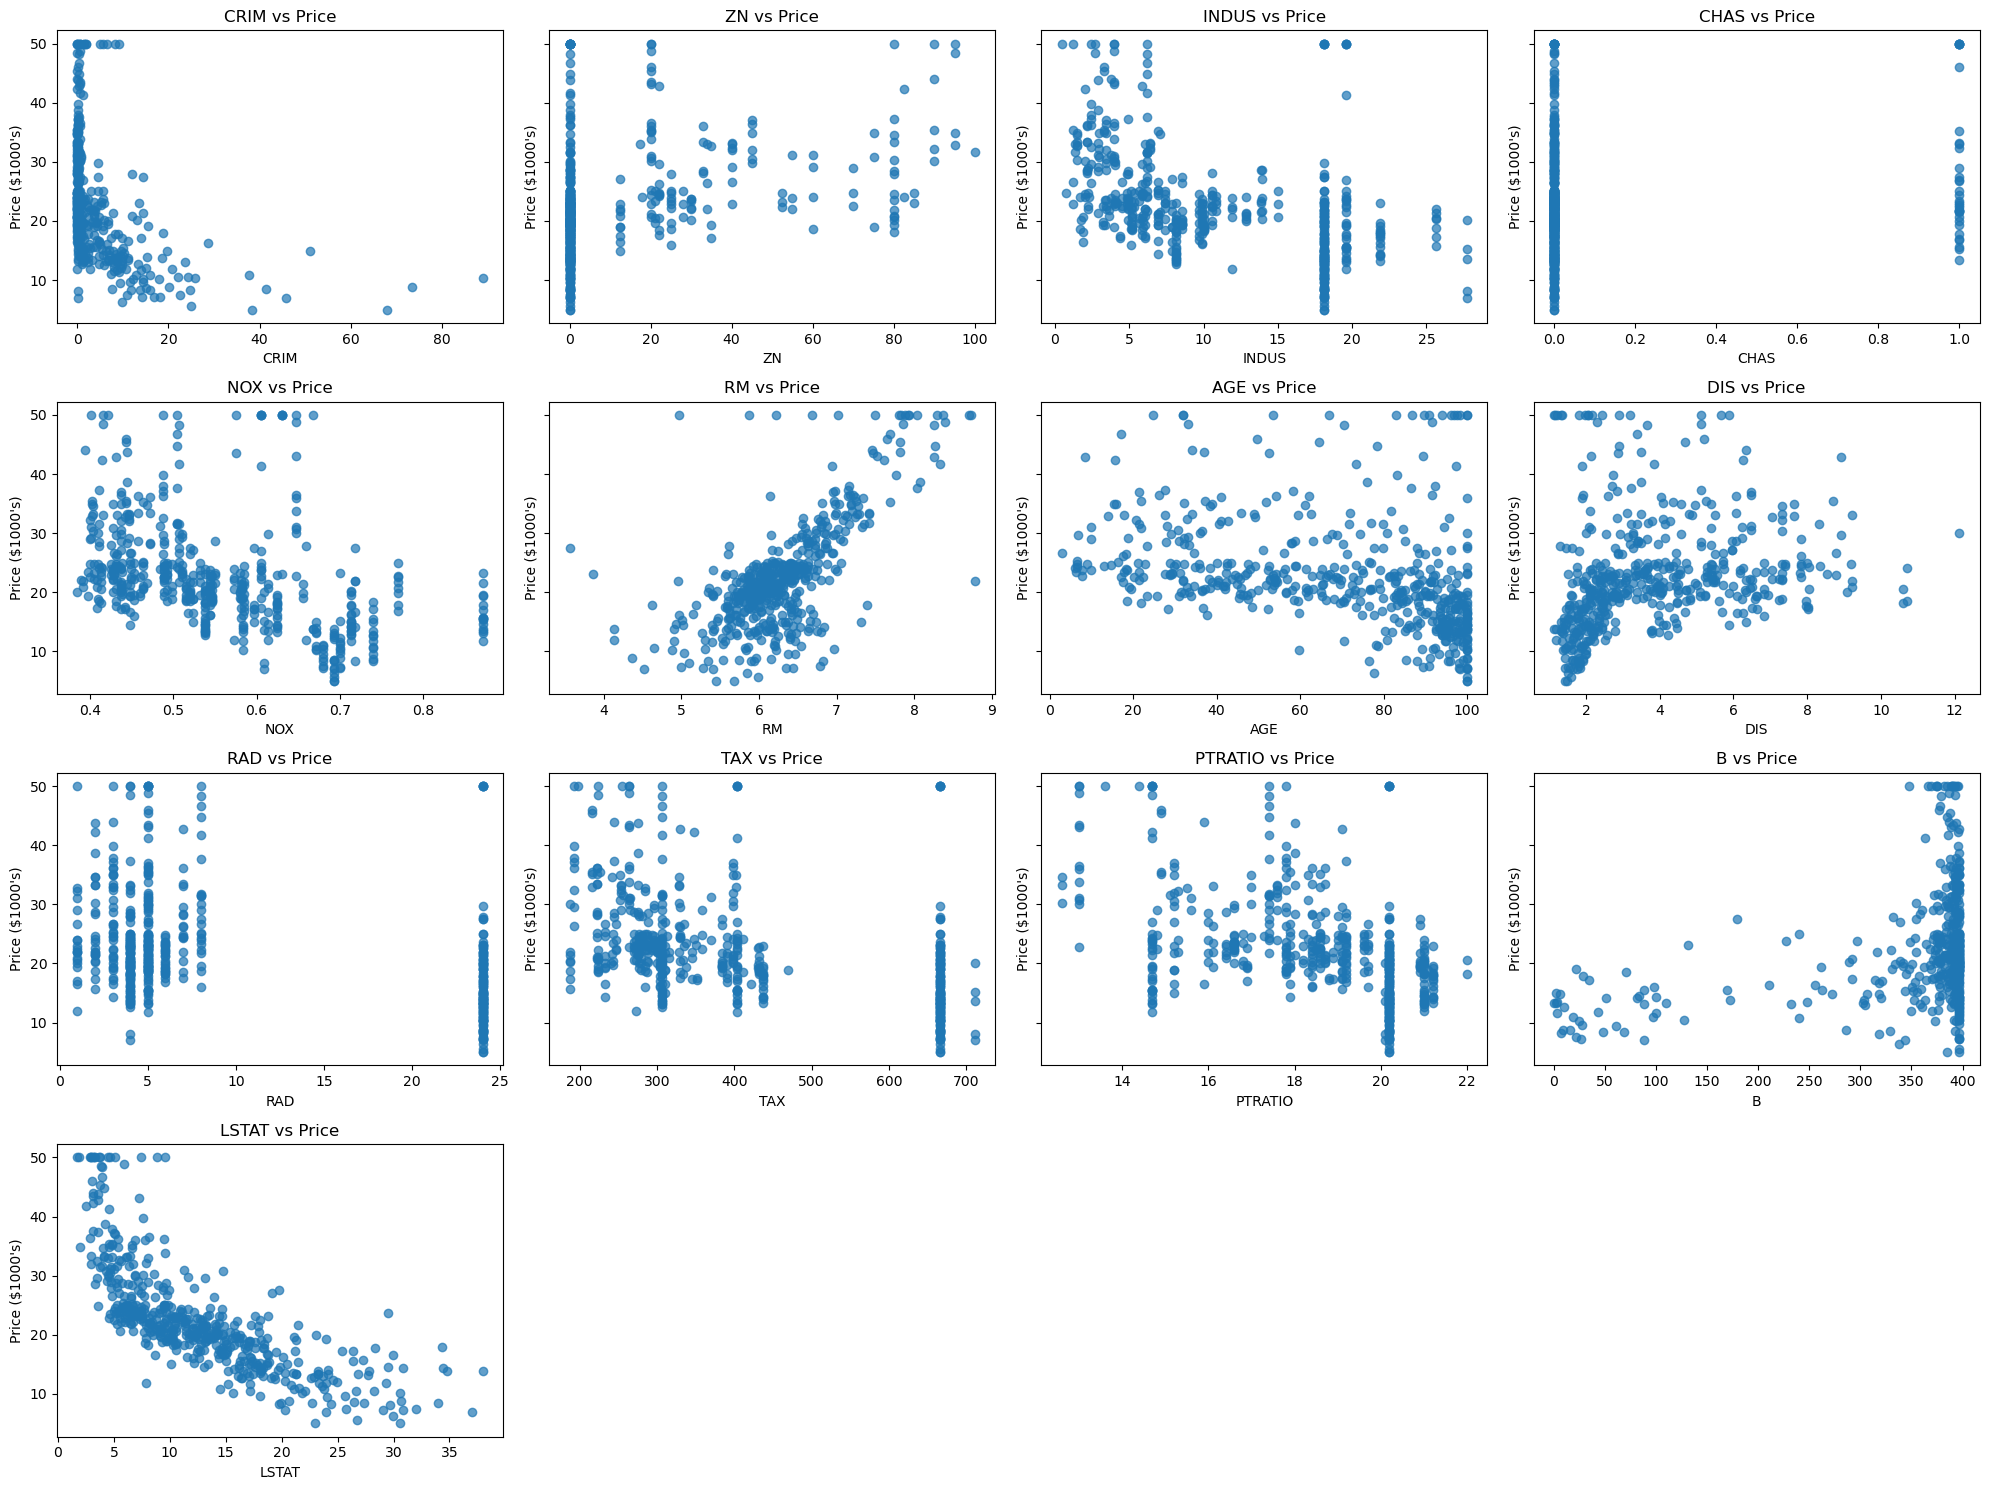

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(20, 15), sharey=True)
ax = ax.flatten()  

for i in range(13):  # Loop through all 13 features
    ax[i].scatter(X_train.iloc[:, i], y_train, alpha=0.7)
    ax[i].set_xlabel(X_train.columns[i])  # Feature name
    ax[i].set_ylabel("Price ($1000's)")
    ax[i].set_title(f"{X_train.columns[i]} vs Price")

# Remove empty subplots (last one if fewer features than grid space)
for j in range(13, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()




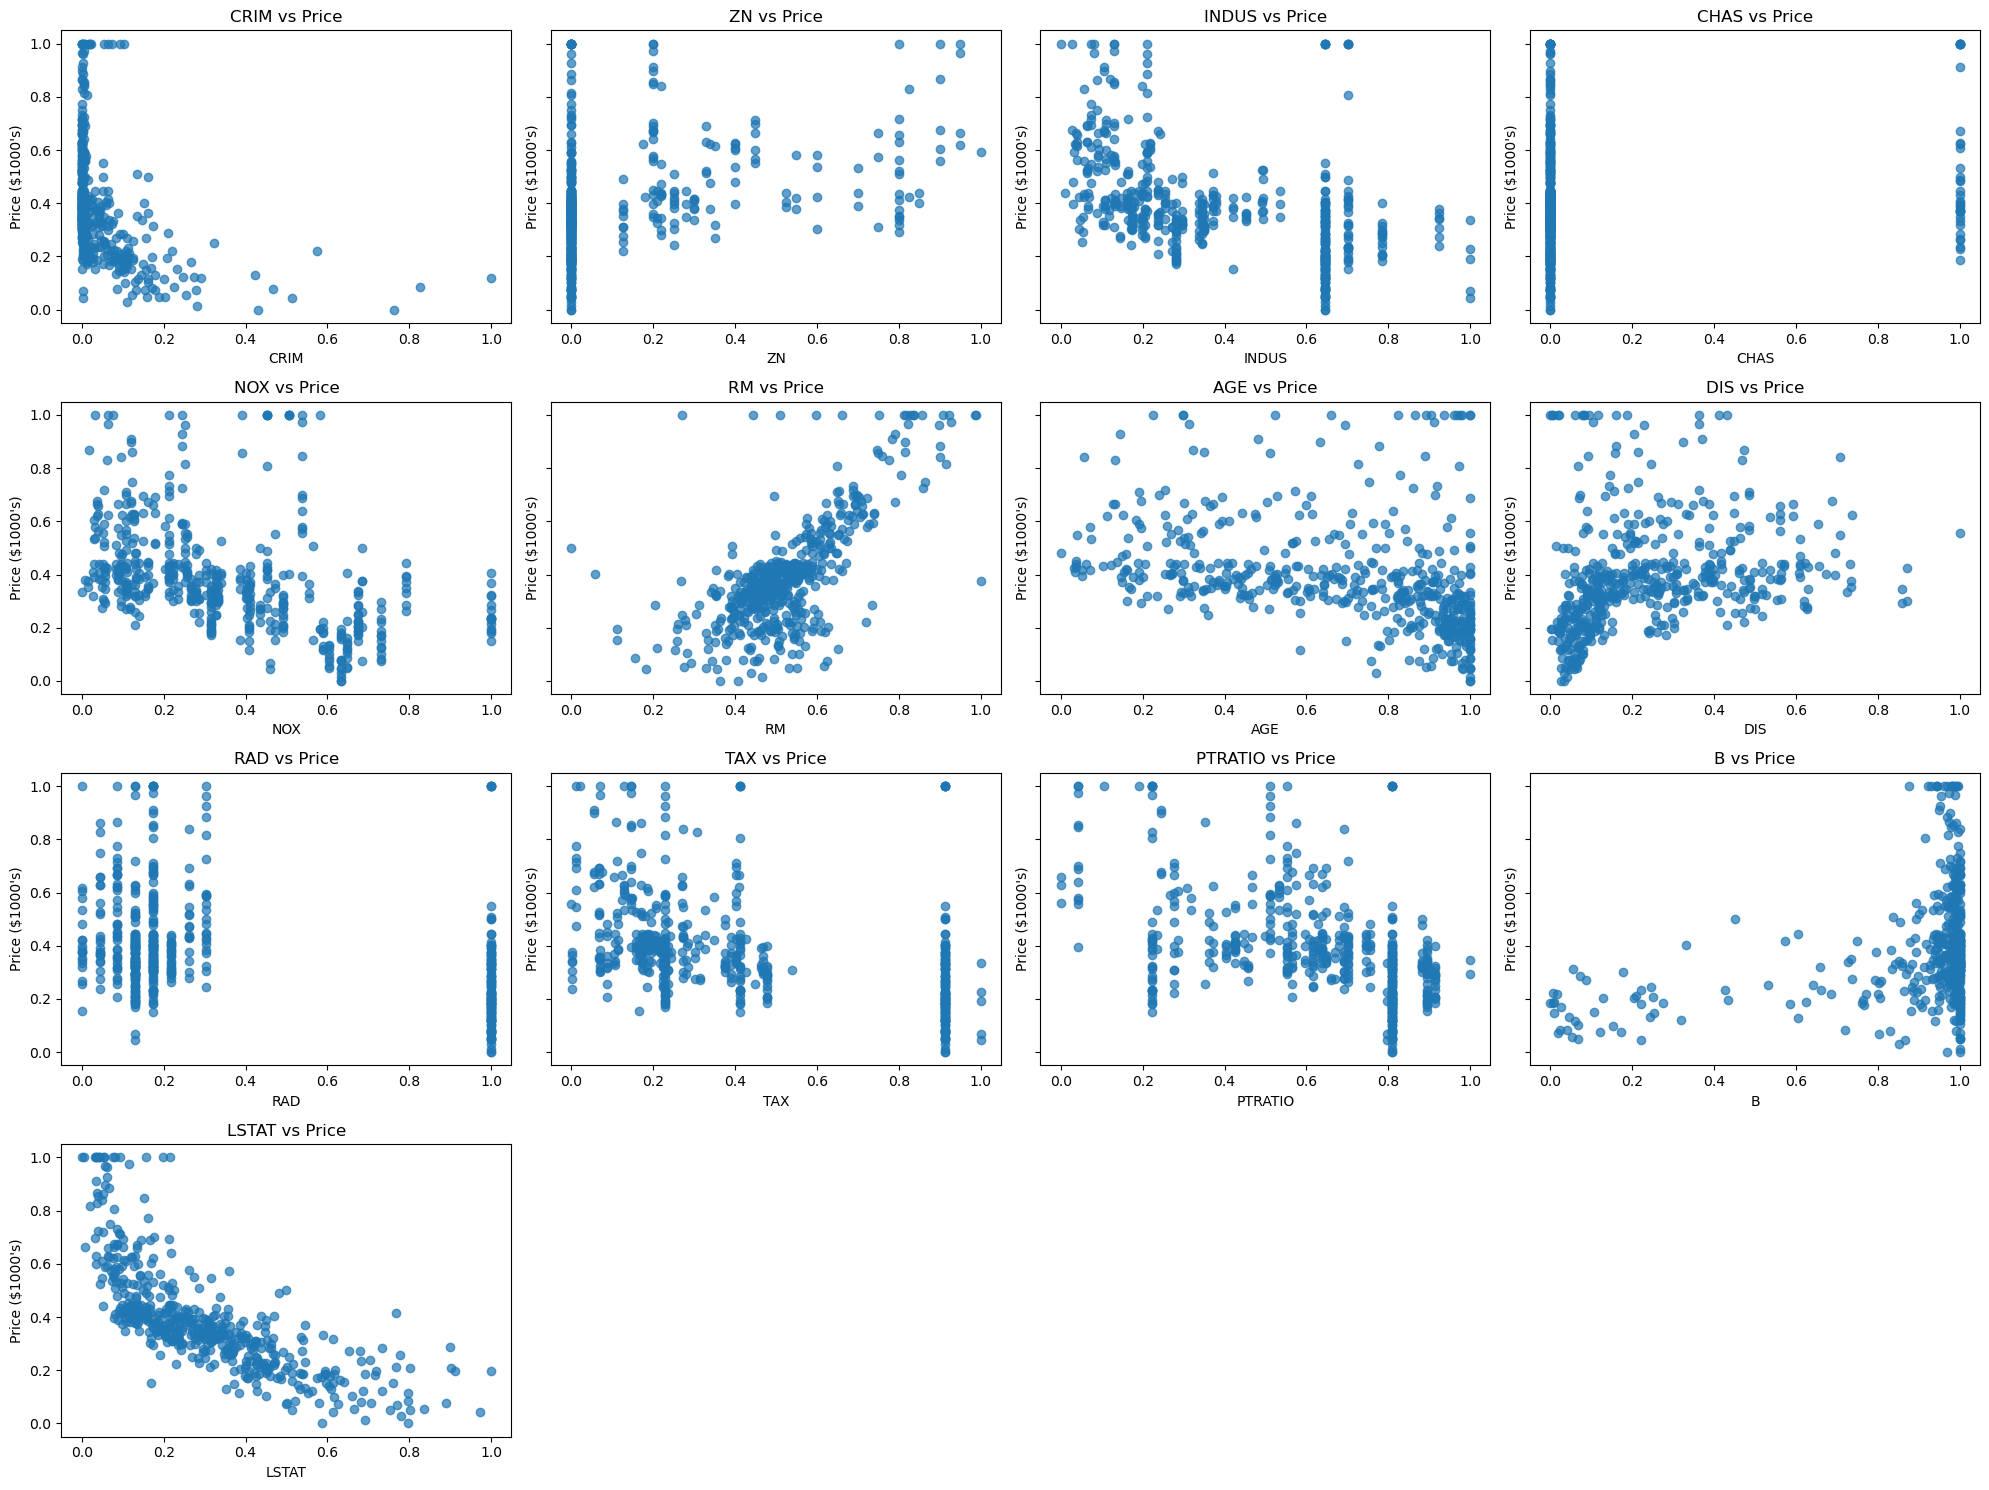

In [11]:
fig, ax = plt.subplots(4, 4, figsize=(20, 15), sharey=True)
ax = ax.flatten()  

for i in range(13):  # Loop through all 13 features
    ax[i].scatter(xdn.iloc[:, i], ydn, alpha=0.7)
    ax[i].set_xlabel(xdn.columns[i])  
    ax[i].set_ylabel("Price ($1000's)")
    ax[i].set_title(f"{xdn.columns[i]} vs Price")

# Remove empty subplots (last one if fewer features than grid space)
for j in range(13, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
#plt.show()




In [12]:
print(X_train.shape)
print(y_train.shape)

(506, 13)
(506,)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential([
    tf.keras.Input(shape=(13,)),
    Dense(64, activation='relu', name='layer1'),
    Dense(32, activation='relu', name='layer2'),
    Dense(16, activation='relu', name='layer3'),
    Dense(1, activation='linear', name='layer4')
    
])


In [53]:
#print(model.layers[2].weights)

In [15]:
layer1, layer2, layer3,layer4 = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (13, 64), b1 shape = (64,)
W2 shape = (64, 32), b2 shape = (32,)
W3 shape = (32, 16), b3 shape = (16,)


In [16]:
model.compile( loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['Accuracy', 'mean_absolute_error']
)

#model.fit(xdn, ydn,
           epochs=20)

Epoch 1/20
16/16 [==============================] - 2s 11ms/step - loss: 0.0686 - Accuracy: 0.0099 - mean_absolute_error: 0.2049
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0267 - Accuracy: 0.0257 - mean_absolute_error: 0.1190
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0180 - Accuracy: 0.0277 - mean_absolute_error: 0.0970
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0139 - Accuracy: 0.0296 - mean_absolute_error: 0.0831
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0117 - Accuracy: 0.0296 - mean_absolute_error: 0.0744
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0101 - Accuracy: 0.0296 - mean_absolute_error: 0.0687
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0090 - Accuracy: 0.0296 - mean_absolute_error: 0.0646
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0088 - Accuracy: 0.0296 - mea

In [42]:
# def sigmoid(x):
#     z = 1 / 1 + np.exp(-x)
#     return z


# def Dense(a_in, W, b, g):
#     units = W.shape[1]
#     a_out = np.zeros(units)
#     f_wb = np.zeros(units)
    
    
#     for j in range(units):
#         for i in range(units):
#             w = W[j, i]
#             f_wb = np.dot(a_in, w) + b[j]
#             a_out[j, i] = g(f_wb)
#     return a_out
        
 


# # x_layer1 = Dense(xdn, W1_tmp, b1_tmp, sigmoid)
# # a1 = x_layer1(xdn)

# # x_layer2 = Dense(units=1, activation='sigmoid')
# # a2 = x_layer1(a1)



# def Sequential(x, W1, b1, W2, b2, W3, b3):    
#     a1 = Dense(x, W1, b1, sigmoid)
#     a2 = Dense(a1, W2, b2, sigmoid)
#     a3 = Dense(a2, W3, b3, sigmoid)
    
#     return a3

# W1_tmp,b1_tmp = layer1.get_weights()
# W2_tmp,b2_tmp = layer2.get_weights()
# W3_tmp,b3_tmp = layer3.get_weights()

# prediction = Sequential(xdn, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                896       
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 16)                528       
                                                                 
 layer4 (Dense)              (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_pred = model.predict(xdn)

print(y_pred[:5])
print(ydn[:5])



16/16 [==============================] - 0s 2ms/step
[[0.58868754]
 [0.46913192]
 [0.6592942 ]
 [0.6053864 ]
 [0.59593755]]
0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64


In [143]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(xdn, ydn, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor(enable_categorical=True,n_estimators=1000,max_depth=3, learning_rate=0.05,subsample= 0.8, colsample_bytree=0.8 )
model.fit(x_train_split, y_train_split)
y_pred = model.predict(x_test_split)  

mse = mean_squared_error(y_test_split, y_pred)

# Evaluate
print(f"Model score: {model.score(x_test_split, y_test_split)}")
print(f"y_pred is this: {y_pred}")
print(F"this is the mse:{mse}")


Model score: 0.9321152183065188
y_pred is this: [0.4366218  0.60118634 0.25901663 0.40731987 0.2823545  0.37116975
 0.29629102 0.22502667 0.357354   0.34899756 0.35489196 0.3009006
 0.02229546 0.3507988  0.30004933 0.48067254 0.3435279  0.0927375
 0.901315   0.2136424  0.45435348 0.45917994 0.17425284 0.35940298
 0.22190797 0.22504304 0.3826454  0.16647902 0.3455987  0.38812014
 0.3428417  0.39719358 0.31384072 0.35625184 0.22799212 0.2267341
 0.6265259  0.30186898 0.38364086 0.40190858 0.30775806 0.5483405
 0.9336964  0.3308565  0.41169116 0.2090727  0.2329954  0.4200644
 0.32911935 0.47629458 0.34860864 0.69085175 0.27412087 0.46136218
 0.9299914  0.3621656  0.24724793 0.6102043  0.38405907 0.2976954
 0.4202351  0.6805365  0.62858075 0.29728025 0.42185605 0.28751495
 0.16808844 0.41404763 0.5451076  0.24881017 0.36996534 0.4283516
 0.13891184 0.35098708 0.3838935  0.00204311 0.34859282 0.92835647
 0.12636986 0.16552456 0.3827607  0.22808276 0.33320048 0.13425653
 0.29962045 0.5032103

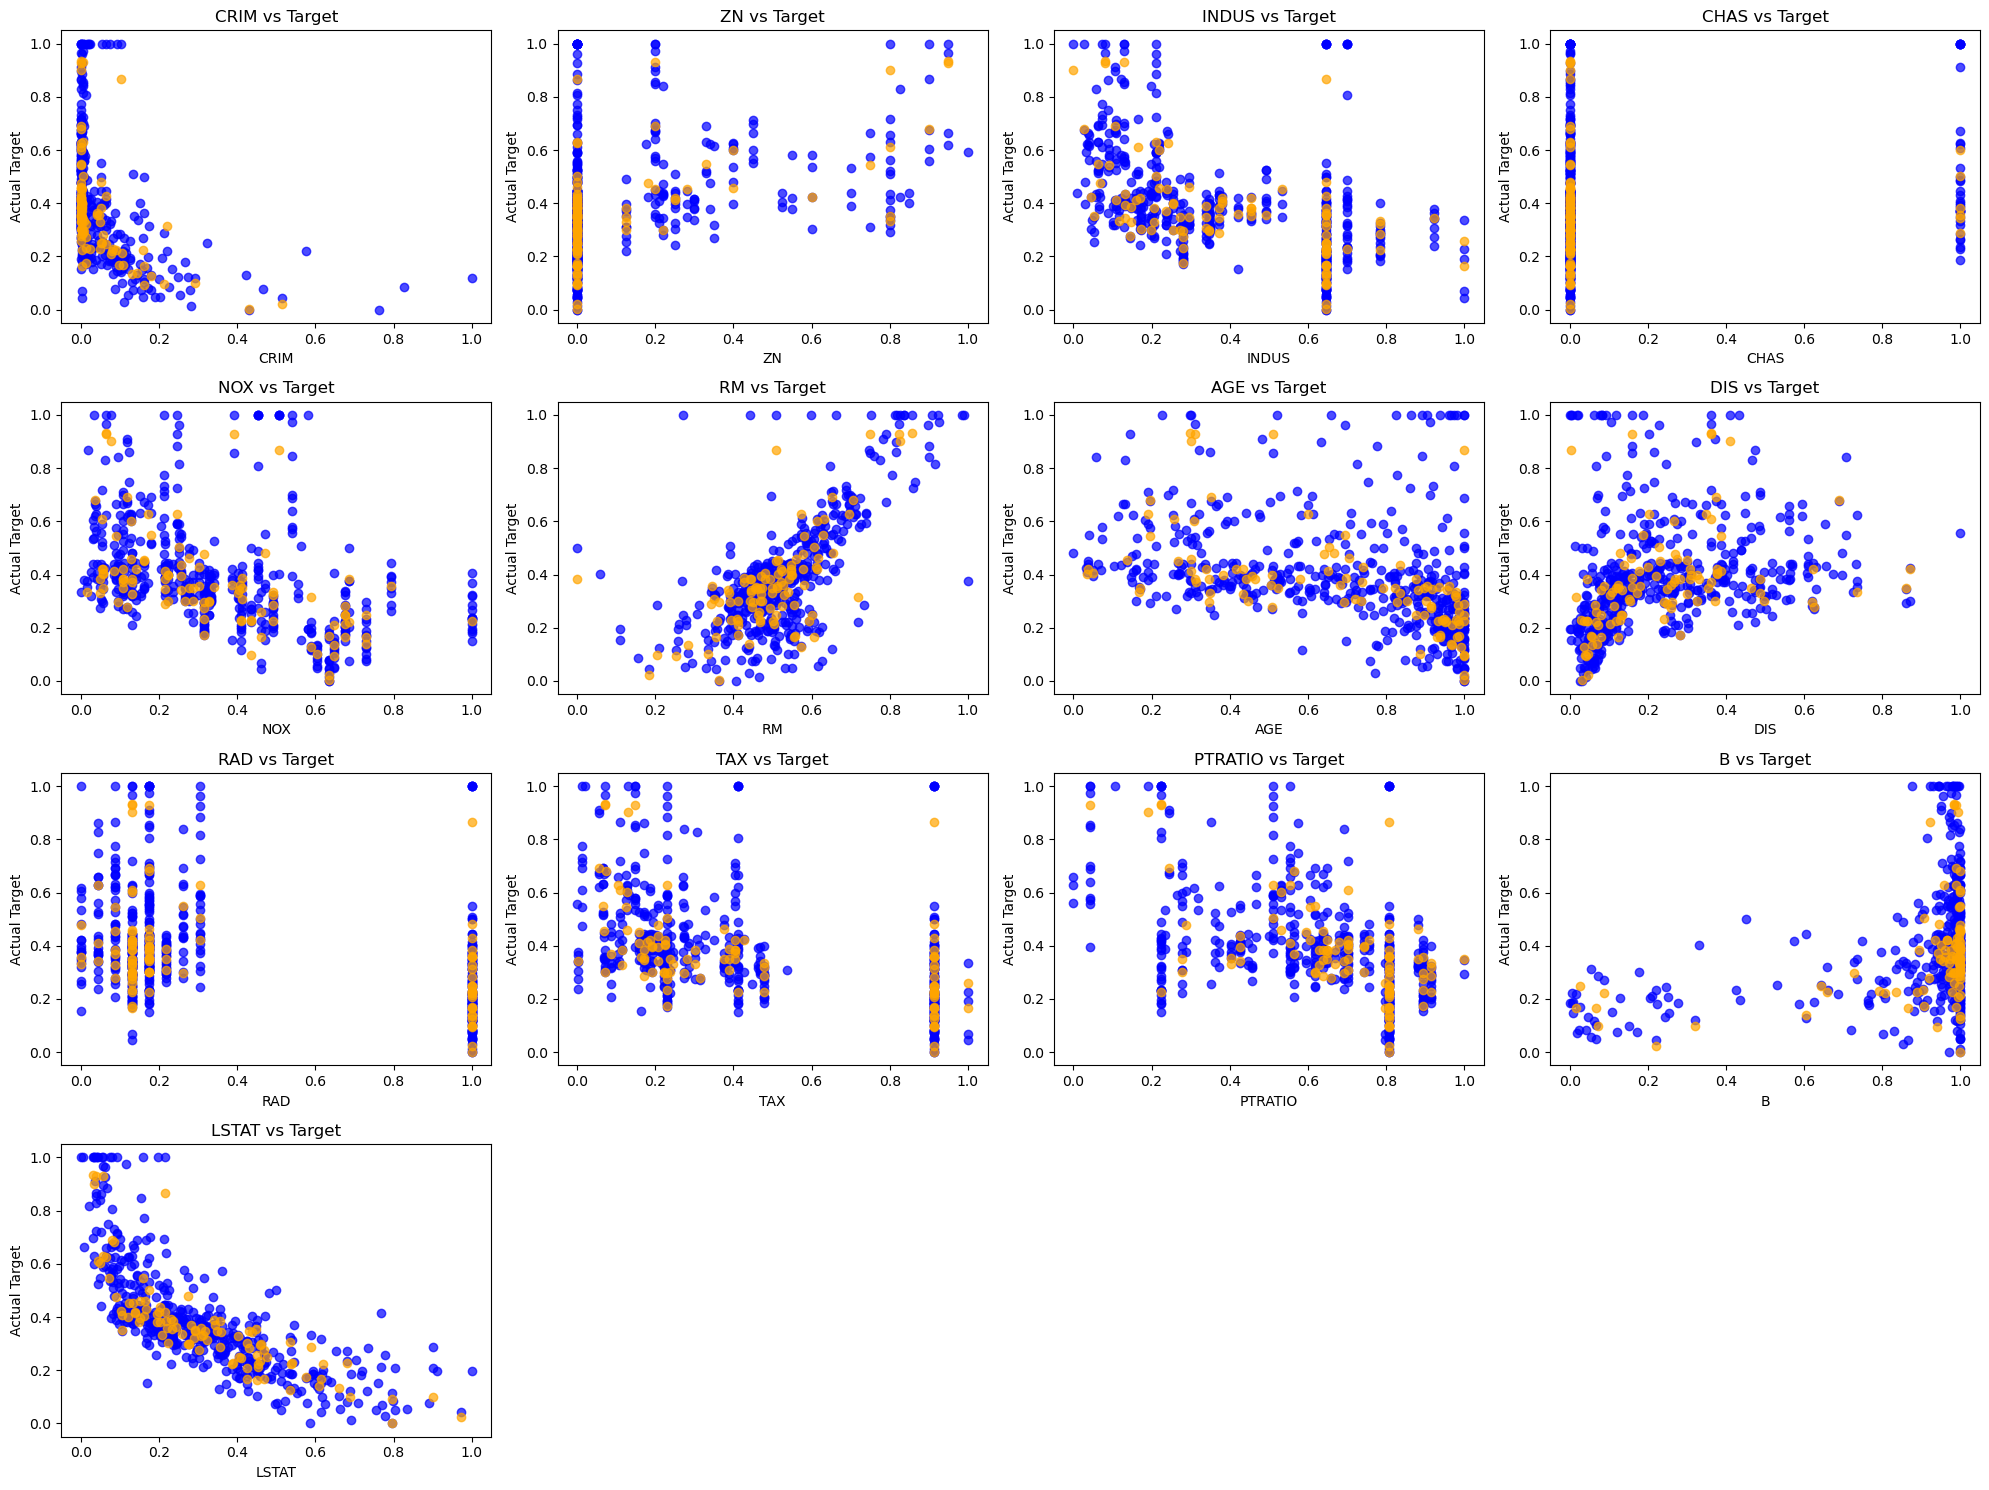

In [161]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
ax = ax.flatten()


for i in range(13):
    ax[i].scatter(xdn.iloc[:,i], ydn, color='blue', alpha=0.7)
    ax[i].set_xlabel(xdn.columns[i])
    ax[i].set_ylabel('Actual Target')
    ax[i].set_title(f"{xdn.columns[i]} vs Target")
    ax[i].scatter(x_test_split.iloc[:,i], y_pred, color='orange', alpha=0.7)
    

# Remove any unused subplots
for j in range(num_features, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()
    

In [49]:
from sklearn.model_selection import cross_val_score
model1 = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8)


cv_scores = cross_val_score(model1, xdn, ydn, cv=10, scoring='neg_mean_squared_error')

cv_scores = -cv_scores

print(f"Cross-Validation MSE Scores for each fold: {cv_scores}")
print(f"Mean MSE across all folds: {np.mean(cv_scores)}")


Cross-Validation MSE Scores for each fold: [0.00401461 0.00235173 0.00386215 0.01187873 0.00648761 0.00551553
 0.00394609 0.04675087 0.00590808 0.00541186]
Mean MSE across all folds: 0.00961272650775093
